In [1]:
import os 
import numpy as np
from scipy.io import wavfile
import pandas as pd
import csv
from pandas import Series

import matplotlib.pyplot as plt
import librosa.display
import soundfile
import glob

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

<h1>Data extraction</h1>

<h3>Audio files</h3>

In [2]:
path = 'audio/'
audio_files = os.listdir(path) # not ordered

audio_id = sorted([int(af.split('.')[0]) for af in audio_files])
audio_files = [str(i)+'.wav' for i in audio_id] # ordered
audio_files[:10]

['0.wav',
 '1.wav',
 '2.wav',
 '3.wav',
 '4.wav',
 '5.wav',
 '6.wav',
 '7.wav',
 '8.wav',
 '9.wav']

Separation **development-evaluation**

In [3]:
audio_dev = audio_files[:9597]
audio_eval = audio_files[9597:]

Audio extraction as **numpy array**

In [4]:
X_dev = []
rates_dev = []

for ad in audio_dev:
    complete_path = path + ad
    rates_dev.append(wavfile.read(complete_path)[0])
    X_dev.append(wavfile.read(complete_path)[1])

len(X_dev), len(X_dev[0]), X_dev[:10]

(9597,
 17352,
 [array([ -46, -103,  -88, ...,    0,    0,    0], dtype=int16),
  array([117, 301, 296, ...,  -2,  -1,   0], dtype=int16),
  array([-1, -2, -2, ..., -1, -1,  0], dtype=int16),
  array([-1, -1, -1, ...,  1,  0,  0], dtype=int16),
  array([ 77, 208, 212, ...,  -2,  -2,   0], dtype=int16),
  array([-121, -294, -274, ...,  -31,  -25,    0], dtype=int16),
  array([-100, -262, -268, ...,   -2,   -1,    0], dtype=int16),
  array([-1, -2, -2, ..., -3, -1,  0], dtype=int16),
  array([15, 50, 62, ..., -3, -2,  0], dtype=int16),
  array([  0, -11, -34, ...,  11,   1,   0], dtype=int16)])

In [5]:
X_eval = []
rates_eval = []

for ad in audio_eval:
    complete_path = path + ad
    rates_eval.append(wavfile.read(complete_path)[0])
    X_eval.append(wavfile.read(complete_path)[1])

len(X_eval), len(X_eval[0]), X_eval[:10]

(3201,
 18260,
 [array([  6,  20,  17, ..., -13,  -3,   0], dtype=int16),
  array([-106, -232, -300, ...,    1,   -3,    0], dtype=int16),
  array([-2, -4, -3, ...,  2,  0,  0], dtype=int16),
  array([0, 0, 0, ..., 2, 1, 0], dtype=int16),
  array([ 68, 175, 156, ...,  -1,  -1,   0], dtype=int16),
  array([-37, -86, -76, ...,  -2,  -1,   0], dtype=int16),
  array([-13, -50, -57, ..., -13, -10,   0], dtype=int16),
  array([-16, -51, -51, ...,  -2,  -1,   0], dtype=int16),
  array([ 0,  0,  0, ..., -1, -1,  0], dtype=int16),
  array([ 0,  0,  0, ..., -1, -1,  0], dtype=int16)])

<h3>Emotions</h3>

In [6]:
with open('development.csv') as fp:
    reader = csv.reader(fp)
    col_check = next(reader)
    sentiments = [cols[0] for cols in reader]

sentiments[:10]

['Disgusted',
 'Fearful',
 'Neutral',
 'Happy',
 'Angry',
 'Sad',
 'Disgusted',
 'Happy',
 'Angry',
 'Neutral']

<h3>Dataframe audio-emotion</h3>

In [7]:
df_dev = pd.DataFrame(zip(audio_dev, sentiments), columns=['name', 'sentiment'])
df_dev.head()

,name,sentiment
0,0.wav,Disgusted
1,1.wav,Fearful
2,2.wav,Neutral
3,3.wav,Happy
4,4.wav,Angry


Conversion: emotion -> int

In [8]:
sentiments_dict = {
    "Disgusted": "1",
    "Neutral": "2",
    "Fearful": "3",
    "Sad": "4",
    "Happy": "5",
    "Angry": "6",
    "Suprised": "7" 
}

In [9]:
y_dev = [sentiments_dict[s] for s in sentiments]
y_dev[:10], sentiments[:10]

(['1', '3', '2', '5', '6', '4', '1', '5', '6', '2'],
 ['Disgusted',
  'Fearful',
  'Neutral',
  'Happy',
  'Angry',
  'Sad',
  'Disgusted',
  'Happy',
  'Angry',
  'Neutral'])

# Data Exploration

<h2>Class distribution</h2>

In [10]:
df_dev.groupby(by='sentiment').sentiment.count().sort_values(ascending=False)

sentiment
Angry        1625
Happy        1625
Sad          1625
Fearful      1535
Disgusted    1397
Neutral      1346
Suprised      444
Name: sentiment, dtype: int64

<h2>Amplitude and length</h2>

* **Amplitude**: how loud we perceive the signal to be. Larger amplitude means louder sound. Zero amplitude means no sound.
* **Length**: duration of the sound

In [11]:
amplitudes = [max(abs(x)) for i, x in enumerate(X_dev)]

In [12]:
lengths_dev = [x.shape[0] / rates_dev[i] for i, x in enumerate(X_dev)]
lengths_eval = [x.shape[0] / rates_eval[i] for i, x in enumerate(X_eval)]

List all the recordings' **lenghts**, and plot them as an histogram. 

In [100]:
from scipy.fftpack import fft
import numpy as np
import math

with soundfile.SoundFile(audio_sort[4]) as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate

D = librosa.stft(waveform)
magnitude, phase = librosa.magphase(D)

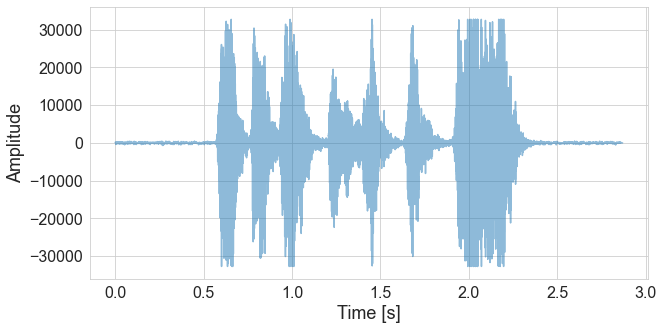

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10,5))

length = X_dev[4].shape[0] / rates_dev[4]
time = np.linspace(0., length, X_dev[4].shape[0])
plt.plot(time, X_dev[4], alpha=0.5)
plt.xlabel("Time [s]", fontsize=18)
plt.tick_params(labelsize=16)
plt.ylabel("Amplitude", fontsize=18)

plt.savefig("amplitude.png")
        
plt.show()

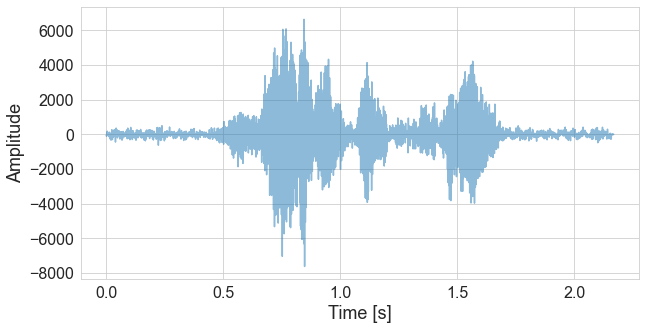

In [143]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,5))

length = X_dev[0].shape[0] / rates_dev[0]
time = np.linspace(0., length, X_dev[0].shape[0])
plt.plot(time, X_dev[0], alpha=0.5)
plt.xlabel("Time [s]", fontsize=18)
plt.tick_params(labelsize=16)
plt.ylabel("Amplitude", fontsize=18)

plt.savefig("amplitude_happy.png")
        
plt.show()

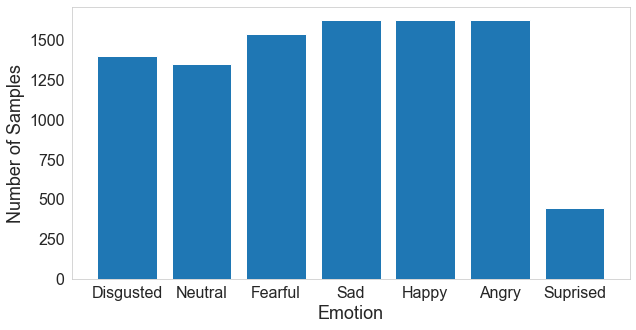

In [127]:
# plot emotions
plt.figure(figsize=(10,5))

#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(y_dev, return_counts=True)

plt.bar(x=range(7), height=count)
plt.xticks(ticks=range(7), labels = ["Disgusted", "Neutral", "Fearful", "Sad", "Happy", "Angry", "Suprised"])
plt.xlabel('Emotion', fontsize=18)
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples', fontsize=18)

plt.savefig("emotions.png")
plt.show()

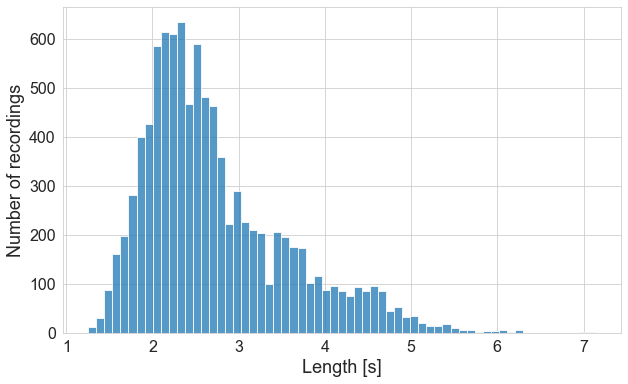

In [135]:
lengths_dev = [x.shape[0] / rates_dev[i] for i, x in enumerate(X_dev)]

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(lengths_dev)
plt.xlabel("Length [s]", fontsize=18)
plt.tick_params(labelsize=16)
plt.ylabel("Number of recordings", fontsize=18)

plt.savefig("lengths.png")
plt.show()

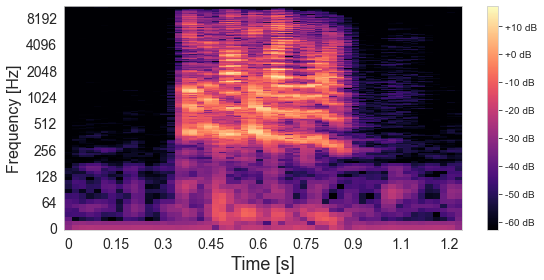

In [197]:
with soundfile.SoundFile(audio_sort[3]) as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate

stft_spectrum_matrix = librosa.stft(waveform)
plt.figure(figsize=(8, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix)),y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time [s]", fontsize=18)
plt.tick_params(labelsize=14)
plt.ylabel("Frequency [Hz]", fontsize=16)
plt.tight_layout()

plt.savefig("spec_happy.png")
plt.show()

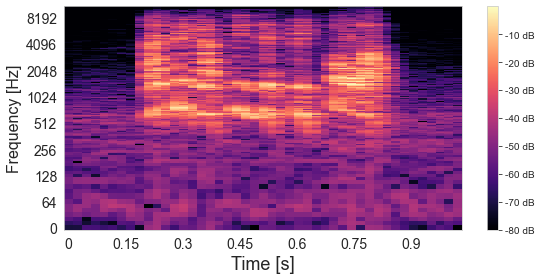

In [198]:
with soundfile.SoundFile(audio_sort[4]) as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate

stft_spectrum_matrix = librosa.stft(waveform)
plt.figure(figsize=(8, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time [s]", fontsize=18)
plt.tick_params(labelsize=14)
plt.ylabel("Frequency [Hz]", fontsize=16)
plt.tight_layout()

plt.savefig("spec_angry.png")
plt.show()

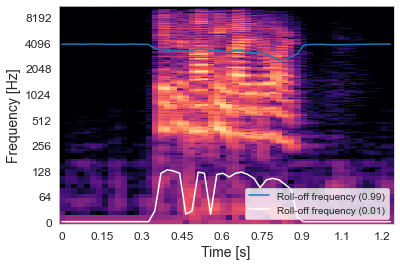

In [288]:
with soundfile.SoundFile(audio_sort[3]) as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate

# Approximate maximum frequencies with roll_percent=0.85 (default)
librosa.feature.spectral_rolloff(y=waveform, sr=sample_rate)
# Approximate maximum frequencies with roll_percent=0.99
rolloff = librosa.feature.spectral_rolloff(y=waveform, sr=sample_rate, roll_percent=0.99)
# Approximate minimum frequencies with roll_percent=0.01
rolloff_min = librosa.feature.spectral_rolloff(y=waveform, sr=sample_rate, roll_percent=0.01)
    
S, phase = librosa.magphase(librosa.stft(waveform))

fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')

plt.xlabel("Time [s]", fontsize=14)
plt.tick_params(labelsize=12)
plt.ylabel("Frequency [Hz]", fontsize=14)

plt.savefig("rolloff_happy.png")

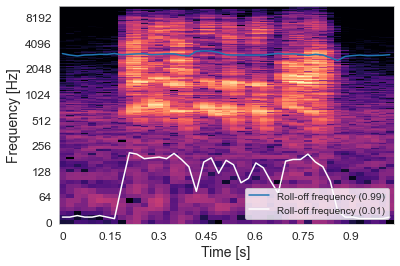

In [287]:
with soundfile.SoundFile(audio_sort[4]) as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate

# Approximate maximum frequencies with roll_percent=0.85 (default)
librosa.feature.spectral_rolloff(y=waveform, sr=sample_rate)
# Approximate maximum frequencies with roll_percent=0.99
rolloff = librosa.feature.spectral_rolloff(y=waveform, sr=sample_rate, roll_percent=0.99)
# Approximate minimum frequencies with roll_percent=0.01
rolloff_min = librosa.feature.spectral_rolloff(y=waveform, sr=sample_rate, roll_percent=0.01)
    
S, phase = librosa.magphase(librosa.stft(waveform))

fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')

plt.xlabel("Time [s]", fontsize=14)
plt.tick_params(labelsize=12)
plt.ylabel("Frequency [Hz]", fontsize=14)

plt.savefig("rolloff_angry.png")

# Preprocessing

<h2>Data cleaning</h2>

The audio '8005.wav' is empty, so we decide to exclude it

In [14]:
a = [x for x in X_dev[8005]]
set(a)

{0}

In [15]:
X_dev.pop(8005) # throw away audio file

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [16]:
audio_dev.pop(8005) # throw away audio file

'8005.wav'

In [17]:
y_dev.pop(8005) #throw away relative emotion

'4'

In [18]:
sentiments.pop(8005) #throw away relative emotion

'Sad'

<h5>Updated dataframe audio-emotion(int)</h5>

In [19]:
df_dev = pd.DataFrame(zip(audio_dev, y_dev), columns=['name', 'sentiment'])
df_dev[8000:8007]

,name,sentiment
8000,8000.wav,5
8001,8001.wav,2
8002,8002.wav,4
8003,8003.wav,3
8004,8004.wav,4
8005,8006.wav,1
8006,8007.wav,6


<h2>Feature Extraction</h2>

In [21]:
import librosa

def feature_chromagram(waveform, sample_rate):
    # STFT computed here explicitly; mel spectrogram and MFCC functions do this under the hood
    stft_spectrogram=np.abs(librosa.stft(waveform))
    # Produce the chromagram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
    return chromagram

def feature_chromagram_std(waveform, sample_rate):
    # STFT computed here explicitly; mel spectrogram and MFCC functions do this under the hood
    stft_spectrogram=np.abs(librosa.stft(waveform))
    # Produce the chromagram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    chromagram=np.std(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
    return chromagram

def feature_melspectrogram(waveform, sample_rate):
    # Produce the mel spectrogram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # Using 8khz as upper frequency bound should be enough for most speech classification tasks
    melspectrogram=np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128).T,axis=0)
    return melspectrogram

def feature_melspectrogram_std(waveform, sample_rate):
    # Produce the mel spectrogram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # Using 8khz as upper frequency bound should be enough for most speech classification tasks
    melspectrogram=np.std(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128).T,axis=0)
    return melspectrogram

def feature_mfcc(waveform, sample_rate):
    # Compute the MFCCs for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # 40 filterbanks = 40 coefficients
    mfc_coefficients=np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfc_coefficients

def feature_mfcc_std(waveform, sample_rate):
    # Compute the MFCCs for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # 40 filterbanks = 40 coefficients
    mfc_coefficients=np.std(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfc_coefficients

def feature_rolloff_max(waveform, sample_rate):
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=waveform, sr=sample_rate, roll_percent=0.99).T, axis=0)
    return rolloff

def feature_rolloff_max_std(waveform, sample_rate):
    rolloff = np.std(librosa.feature.spectral_rolloff(y=waveform, sr=sample_rate, roll_percent=0.99).T, axis=0)
    return rolloff

def feature_rolloff_min(waveform, sample_rate):
    rolloff_min = np.mean(librosa.feature.spectral_rolloff(y=waveform, sr=sample_rate, roll_percent=0.01).T, axis=0)
    return rolloff_min

def feature_rolloff_min_std(waveform, sample_rate):
    rolloff_min = np.std(librosa.feature.spectral_rolloff(y=waveform, sr=sample_rate, roll_percent=0.01).T, axis=0)
    return rolloff_min

In [25]:
def get_features(file):
    # load an individual soundfile
     with soundfile.SoundFile(file) as audio:
        waveform = audio.read(dtype="float32")
        sample_rate = audio.samplerate
        # compute features of soundfile
        chromagram = feature_chromagram(waveform, sample_rate)
        melspectrogram = feature_melspectrogram(waveform, sample_rate)
        mfc_coefficients = feature_mfcc(waveform, sample_rate)
#         chromagram_std = feature_chromagram_std(waveform, sample_rate)
#         melspectrogram_std = feature_melspectrogram_std(waveform, sample_rate)
        mfc_coefficients_std = feature_mfcc_std(waveform, sample_rate)
        rolloff_mean = feature_rolloff_max(waveform, sample_rate)
        rolloff_std = feature_rolloff_max_std(waveform, sample_rate)
        rolloff_min_mean = feature_rolloff_min(waveform, sample_rate)
        rolloff_min_std = feature_rolloff_min_std(waveform, sample_rate)

        feature_matrix=np.array([])
        # use np.hstack to stack our feature arrays horizontally to create a feature matrix
        feature_matrix = np.hstack((chromagram, 
                                    melspectrogram, 
                                    mfc_coefficients, 
                                    #chromagram_std, 
                                    #melspectrogram_std, 
                                    mfc_coefficients_std,
                                    rolloff_mean,
                                    rolloff_std,
                                    rolloff_min_mean,
                                    rolloff_min_std
                                   ))
        
        return feature_matrix

Each of the 1440 feature arrays has **360 features** composed by mean and std of:
* **12 chromagram pitch classes** 
* **128 mel spectrogram bands** 
* **40 MFC coefficients**

<h3> Saving Features </h3>

In [26]:
path_load = 'audio/*.wav' # we open each file audio
audio_id = [file for file in glob.glob(path_load)] 
audio_sort = sorted(audio_id, key = lambda audio_id: int((audio_id.split('\\')[1]).split('.')[0]))
audio_sort.pop(8005)

'audio\\8005.wav'

In [27]:
audio_sort[8000:8010]

['audio\\8000.wav',
 'audio\\8001.wav',
 'audio\\8002.wav',
 'audio\\8003.wav',
 'audio\\8004.wav',
 'audio\\8006.wav',
 'audio\\8007.wav',
 'audio\\8008.wav',
 'audio\\8009.wav',
 'audio\\8010.wav']

<h5>Development Features Loading</h5>

In [28]:
def load_data_dev():
    features_list = []
    count = 0

    for audio in audio_sort[:9596]:
        features = get_features(audio)
        features_list.append(features)
        count += 1
        print('\r' + f' Processed {count}/{9596} audio samples',end=' ')

    return np.array(features_list)

In [29]:
# check if our function is correct: 360 features for each audio
features = get_features(audio_sort[0])
features.shape

(224,)

In [30]:
# load and save the features

#features = load_data_dev()
#np.save('features_nostdev.npy', features) # save
features = np.load('features_rolloff.npy') # load

<h5>Evaluation Features Loading</h5>

In [31]:
def load_data_eval():
    features_list = []
    count = 0

    for audio in audio_sort[9596:]:
        features_e = get_features(audio)
        features_list.append(features_e)
        count += 1
        print('\r' + f' Processed {count}/{3201} audio samples',end=' ')

    return np.array(features_list)

In [32]:
# load and save the features

#features_e = load_data_eval()
#np.save('features_e_nostd.npy', features_e) # save
features_e = np.load('features_e_rolloff.npy') # load

<h5>Showing Development Features</h5>

In [33]:
print(f'\nAudio samples represented: {features.shape[0]}')
print(f'Numerical features extracted per sample: {features.shape[1]}')
features_df = pd.DataFrame(features) # make it pretty for display
features_df


Audio samples represented: 9596
Numerical features extracted per sample: 364


,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
0,0.500702,0.566852,0.558705,0.572815,0.680766,0.683455,0.689658,0.661096,0.632921,0.774900,...,3.815581,4.382455,3.057659,3.097473,4.610806,3.328471,2940.372243,141.421575,30.675551,28.408440
1,0.457588,0.619915,0.526074,0.450749,0.455352,0.446734,0.428917,0.520044,0.722071,0.826758,...,2.492504,2.736218,3.377244,3.754461,3.351496,3.033338,2942.057292,188.778189,15.066964,5.626668
2,0.540411,0.523314,0.545674,0.546722,0.591107,0.673998,0.622826,0.710355,0.702440,0.702173,...,4.419738,4.240627,3.332010,4.420833,5.721165,7.848355,3579.427083,407.704519,40.625000,42.720638
3,0.634227,0.611535,0.608163,0.645341,0.638600,0.663452,0.632984,0.664319,0.652212,0.693982,...,11.756641,10.084002,6.374441,10.700718,10.717606,7.109241,3619.429977,410.580139,41.304977,53.107348
4,0.694610,0.670607,0.667591,0.557383,0.484761,0.496171,0.564764,0.571357,0.526096,0.596822,...,6.046869,7.090706,4.845734,5.325657,3.858975,3.651301,2994.791667,122.995539,102.604167,74.950251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9591,0.552948,0.585742,0.648127,0.631997,0.676941,0.588888,0.628685,0.716314,0.683638,0.600254,...,5.181093,4.298060,8.693054,8.477575,6.489693,6.674197,3536.416331,65.577483,27.721774,20.098978
9592,0.511008,0.462866,0.425166,0.373660,0.496012,0.644718,0.598477,0.598838,0.602773,0.646948,...,6.363210,8.060936,5.480749,4.298759,4.889139,6.013062,3106.617647,603.613983,27.688419,60.399322
9593,0.437109,0.474989,0.493407,0.561063,0.683795,0.648339,0.589527,0.584382,0.597951,0.622159,...,6.800028,4.767545,4.854922,5.744452,3.497015,8.161992,3409.561821,268.944757,35.835598,35.664952
9594,0.457277,0.548623,0.473472,0.423716,0.430482,0.516248,0.593164,0.555303,0.549006,0.582210,...,5.447302,10.385190,5.684510,5.781662,5.212767,5.021482,3191.406250,523.521517,22.288603,48.894986


<h5>Showing Evaluation Features</h5>

In [34]:
print(f'\nAudio samples represented: {features_e.shape[0]}')
print(f'Numerical features extracted per sample: {features_e.shape[1]}')
features_df_e = pd.DataFrame(features_e) # make it pretty for display
features_df_e


Audio samples represented: 3201
Numerical features extracted per sample: 364


,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
0,0.579606,0.497676,0.334377,0.337228,0.374322,0.502154,0.516508,0.496264,0.557097,0.541895,...,6.892682,9.440127,10.706579,7.166421,4.748840,5.729405,3069.444444,588.004969,53.385417,63.127546
1,0.575775,0.629412,0.632316,0.701033,0.660796,0.492704,0.543325,0.622694,0.614753,0.758012,...,5.905391,7.407476,4.272279,3.465043,3.048451,3.881583,3274.796196,166.710437,24.966033,20.725676
2,0.318462,0.336362,0.344165,0.342262,0.387035,0.565989,0.556035,0.437274,0.430719,0.639036,...,7.384307,7.223394,6.574137,8.568053,7.095102,7.951602,2779.947917,674.702847,2.697173,3.564689
3,0.651978,0.581008,0.587467,0.574779,0.535780,0.597151,0.616904,0.666756,0.677997,0.663353,...,7.259266,3.264596,3.611163,3.443871,3.954422,2.844654,3395.148026,759.982871,91.557018,112.642628
4,0.553493,0.606990,0.700094,0.627647,0.654059,0.663072,0.673213,0.746124,0.773012,0.812928,...,4.110006,2.449063,4.501359,2.929330,3.716128,2.473401,3097.873264,120.074199,13.346354,6.133282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,0.497678,0.444853,0.412034,0.421018,0.443774,0.522786,0.523760,0.504268,0.524100,0.606688,...,5.580297,4.522527,4.652802,4.359658,3.296475,4.021344,3795.530225,174.374473,90.676230,93.381369
3197,0.554727,0.651280,0.537414,0.508922,0.539245,0.528048,0.503548,0.579086,0.659318,0.663135,...,5.616616,6.675679,5.227747,3.719068,5.060220,4.427855,3565.995066,90.670314,33.819901,30.367318
3198,0.509292,0.412877,0.382587,0.440863,0.521328,0.666113,0.564177,0.575636,0.529484,0.483416,...,8.365913,7.431316,6.734173,9.311949,8.308496,6.400976,3651.408451,253.207806,89.733715,78.626723
3199,0.404453,0.384668,0.295008,0.352695,0.413201,0.521100,0.605122,0.463511,0.474480,0.633223,...,4.930772,5.833594,5.136961,5.415641,5.671889,5.572770,3332.519531,419.857996,26.123047,23.283132


# Model Selection

<h3> Train-Test separation </h3>

In [235]:
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    y_dev, 
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

<h2>LGBM</h2>

In [226]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

clf = lgb.LGBMClassifier(
    learning_rate=0.025,
    boosting_type='gbdt',
    objective='multiclass',
    metric='multi_logloss',
    max_depth=37,
    max_bin = 800,
    n_estimators = 2000,
    num_leaves = 22
)

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [227]:
print(classification_report(y_test, y_pred))
print(f'Test Set F-score score =  {100*f1_score(y_test, y_pred, average="macro"):.3}%')

              precision    recall  f1-score   support

           1       0.63      0.57      0.60       290
           2       0.64      0.73      0.68       270
           3       0.70      0.60      0.65       303
           4       0.65      0.76      0.70       324
           5       0.70      0.64      0.67       337
           6       0.77      0.83      0.80       310
           7       0.95      0.84      0.89        86

    accuracy                           0.69      1920
   macro avg       0.72      0.71      0.71      1920
weighted avg       0.70      0.69      0.69      1920

Test Set F-score score =  71.2%


In [84]:
clf.fit(features, y_dev)
y_final = clf.predict(features_e)

<h1>Feature Scaling for Models Comparison</h1>

In [289]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
features_scaled = features 
features_scaled = scaler.fit_transform(features_scaled)

features_scaled_e = features_e
features_scaled_e = scaler.transform(features_scaled_e)

In [204]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    features_scaled, 
    y_dev, 
    test_size=0.2, 
    random_state=42
)

In [228]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    GaussianNB()]

scores = []
for model in classification_models:
    model.fit(X_train_scaled, y_train_scaled)
    y_pred_new=model.predict(X_test_scaled)
    score = f1_score(y_test_scaled, y_pred_new, average="macro")
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.3f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','F1 Score'])
scores_df.sort_values(by='F1 Score',axis=0,ascending=False)

,Classifier,F1 Score
3,RandomForestClassifier,63.890%
0,KNeighborsClassifier,60.273%
1,SVC,60.108%
2,DecisionTreeClassifier,49.052%
4,GaussianNB,25.789%


<h2> Random Forest </h2>

In [236]:
rf = RandomForestClassifier(
    max_depth=200, 
    n_estimators=2000, 
    random_state=42, 
    criterion='entropy',
    max_features='sqrt',    
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Test Set F-score score = {100*f1_score(y_test, y_pred, average="macro"):.3}%')

              precision    recall  f1-score   support

           1       0.61      0.44      0.51       290
           2       0.54      0.72      0.61       270
           3       0.74      0.39      0.51       303
           4       0.58      0.78      0.67       324
           5       0.61      0.58      0.59       337
           6       0.71      0.81      0.75       310
           7       0.92      0.85      0.88        86

    accuracy                           0.63      1920
   macro avg       0.67      0.65      0.65      1920
weighted avg       0.64      0.63      0.62      1920

Test Set F-score score = 64.8%


<h2>MLP</h2>

In [290]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    activation= 'logistic', 
    alpha= 0.01,
    epsilon= 1e-08,
    hidden_layer_sizes= (300,),
    learning_rate= 'adaptive', 
    solver= 'adam',
    max_iter=1000,
    random_state=42
)

model.fit(X_train_scaled, y_train_scaled)
y_pred=model.predict(X_test_scaled)

print(classification_report(y_test_scaled, y_pred))
print(f'Test Set F-score score =  {100*f1_score(y_test_scaled, y_pred, average="macro"):.3}%')

              precision    recall  f1-score   support

           1       0.59      0.58      0.58       290
           2       0.66      0.68      0.67       270
           3       0.59      0.62      0.60       303
           4       0.70      0.72      0.71       324
           5       0.62      0.55      0.58       337
           6       0.74      0.75      0.74       310
           7       0.82      0.85      0.83        86

    accuracy                           0.66      1920
   macro avg       0.67      0.68      0.68      1920
weighted avg       0.66      0.66      0.66      1920

Test Set F-score score =  67.6%


<h1>Hyperparameters Tuning</h1>

<h2>Improving Random Forest</h2>

In [238]:
feat_s = pd.Series(rf.feature_importances_, index=np.arange(0,364))

In [266]:
feat_s_ord = pd.Series.sort_values(feat_s, ascending=False)
top_features = feat_s_ord.index[:100]
top_features

Int64Index([363, 320, 334, 336, 335, 321, 361, 152, 165, 362, 134, 327, 332,
            322,  72,  22, 333, 330, 131, 101, 338, 325, 202,  26, 119, 329,
             21, 132, 164, 157, 201, 337, 102, 140, 345,  18,  65,  27, 328,
            118,  73, 135, 200,  20,  82, 155, 198,  17,  28,  19, 130, 142,
            156, 154,  23, 360, 206, 311, 151,  66, 324, 141, 252,  25,  74,
            203, 153, 331, 147, 207,  71,   4, 310,   9,   3, 178, 342, 159,
            136, 199,  16, 312, 160, 166,  75, 133,  67, 143, 314, 120, 117,
            158, 326, 161,  15,  24, 137, 125, 124,  36],
           dtype='int64')

In [267]:
dfsd = pd.DataFrame()
dfsd = features_df

for i in np.arange(0,360):
    if i not in top_features:
        dfsd = dfsd.drop([i], axis=1)

In [268]:
dfsd_e = pd.DataFrame()
dfsd_e = features_df_e

for i in np.arange(0,360):
    if i not in top_features:
        dfsd_e = dfsd_e.drop([i], axis=1)

In [269]:
new_features=list(list())
for i in np.arange(0,9596):
    new_features.append(dfsd.loc[i])
    
new_features_e=list(list())
for i in np.arange(0,3201):
    new_features_e.append(dfsd_e.loc[i])

<h2>Random Forest with features selection</h2>

In [270]:
X_train, X_test, y_train, y_test = train_test_split(
    new_features, 
    y_dev, 
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

In [271]:
rf = RandomForestClassifier(
    max_depth=200, 
    n_estimators=2000, 
    random_state=42, 
    criterion='entropy',
    max_features='sqrt',    
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Test Set F-score score = {100*f1_score(y_test, y_pred, average="macro"):.3}%')

              precision    recall  f1-score   support

           1       0.61      0.43      0.51       290
           2       0.55      0.73      0.63       270
           3       0.72      0.42      0.53       303
           4       0.59      0.78      0.67       324
           5       0.62      0.58      0.60       337
           6       0.71      0.79      0.75       310
           7       0.87      0.87      0.87        86

    accuracy                           0.64      1920
   macro avg       0.67      0.66      0.65      1920
weighted avg       0.64      0.64      0.63      1920

Test Set F-score score = 65.2%


# Results

In [295]:
clf.fit(features_scaled, y_dev)
y_final = clf.predict(features_scaled_e)

In [296]:
sentiments_dict_2 = {
    "1": "Disgusted",
    "2": "Neutral",
    "3": "Fearful",
    "4": "Sad",
    "5": "Happy",
    "6": "Angry",
    "7": "Suprised"
}

y_final_sent = [sentiments_dict_2[y] for y in y_final]

ids=np.arange(9597,12798)
ids_wav = [str(i)+'.wav' for i in ids]

In [298]:
pd.DataFrame(dict(Id = ids_wav,Predicted = y_final_sent)).to_csv("submission.csv", sep=",", index=False)